# Gaussian mixture

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

data = np.load('formationchannels.npy')

We could have different solutions because it finds a local maximum. If we generate data in principle we could have more extractions

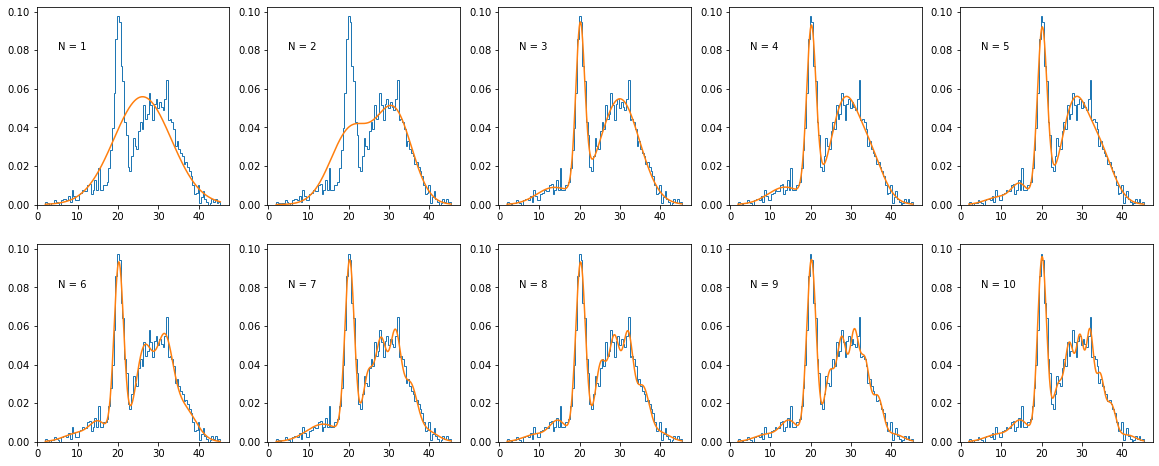

In [57]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
ax = ax.reshape(10)

for i in range(0,10):
    ax[i].hist(data[:,0], bins=100, density=True, histtype = 'step')

x_grid = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 1000)

means = []    #the means of the gaussians are stored here
cov = []      #the covariances are stored here
weights = []  #the weights are stored here
aic = []      #the AIC value is stored here
fit_g = []

for j in range(1,11):
    fitfunc = GaussianMixture(n_components=j, n_init=30) #n_init is the number of initialization points from where the L is maximised
    fit_g.append(fitfunc.fit(data))
    means.append(fit_g[j-1].means_)
    cov.append(fit_g[j-1].covariances_)
    weights.append(fit_g[j-1].weights_)
    aic.append(fitfunc.aic(data))
    
    g = []
    for i in range(0,j):
        g.append(norm(loc=means[j-1][i], scale = (cov[j-1][i])**0.5))

    y_func = np.zeros(len(x_grid))
    
    for i in range(0,j):
        y_func += (g[i].pdf(x_grid)*weights[j-1][i])[0]

    ax[j-1].plot(x_grid, y_func)
    ax[j-1].text(5, 0.08, 'N = %.0f' %j)

3.0


Text(0, 0.5, 'AIC')

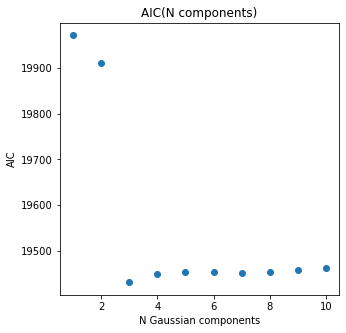

In [58]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
j = np.linspace(1,10,10)

ax.scatter(j, aic)
sort_ind = np.argsort(aic)
j_min = j[sort_ind[0]]
print(j_min)
ax.set_title('AIC(N components)')
ax.set_xlabel('N Gaussian components')
ax.set_ylabel('AIC')

Text(0.5, 1.0, 'best-fit model')

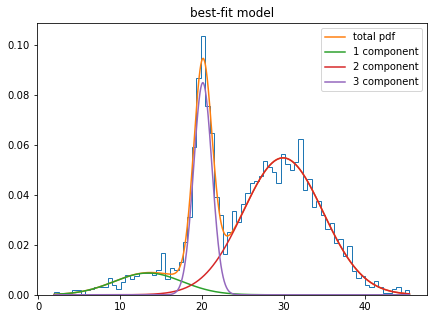

In [59]:
best_mod = fit_g[sort_ind[0]] #best fitting model is the one with the lowest aic

lnL = best_mod.score_samples(x_grid.reshape(-1,1))
L = np.exp(lnL)    #This is the Likelihood but also the pdf of the model


comp_prob = best_mod.predict_proba(x_grid.reshape(-1,1))
ind_comp  = L[:,np.newaxis]*comp_prob

fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.hist(data[:,0], bins=80, density=True, histtype = 'step')
ax.plot(x_grid, L, label='total pdf')

for i in range(len(ind_comp[0])):
    ax.plot(x_grid, ind_comp[:,i], label='%.0f component' %(i+1))

ax.legend()

ax.set_title('best-fit model')